In [696]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import random
import os
os.makedirs("output", exist_ok=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Reading and Accessing Data

In [697]:
df = pd.read_csv('diabetes_diagnosis.csv')
print(df.shape)
df.head()

(264802, 23)


,Unnamed: 0,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,...,Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,...,15.0,NaN,NaN,63.0,High school graduate,"$73,106",No,Yes,Yes,No
1,1,NaN,25.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,Female,54.0,College graduate,"$22,322",No,No,No,No
2,2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,High school graduate,"$29,097",No,Yes,Yes,NaN
3,3,1.0,27.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,74.0,Some high school,"$55,498",No,Yes,No,No
4,4,NaN,24.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Female,NaN,Some college,"$15,629",No,Yes,NaN,No


# Check and handle duplicated value

In [698]:
df = df.drop_duplicates()

In [699]:
df.duplicated().any()

False

# Remove low quality features

In [700]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [701]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(4)
})

print("Missing Values Summary:\n")
print(missing_summary)

Missing Values Summary:

                      Missing Values  Percentage (%)
CholCheck                     150937         56.9999
BMI                            87384         32.9998
Smoker                        119160         44.9997
Stroke                        158881         59.9999
HeartDiseaseorAttack           71496         26.9998
PhysActivity                  188009         70.9998
Fruits                        161529         60.9999
Veggies                       169473         63.9999
AnyHealthcare                 182713         68.9999
NoDocbcCost                   198601         74.9998
GeneralHealth                  68848         25.9998
Mental (days)                 129752         48.9996
Physical (days)               142993         54.0000
DiffWalk                      142993         54.0000
Sex                            68848         25.9998
Age                            63552         23.9998
Education                      76792         28.9998
Income               

In [702]:
df.drop(columns=['CholCheck'], inplace=True, errors='ignore')

In [703]:
df.drop(columns=['NoDocbcCost'], inplace=True, errors='ignore')

In [704]:
df.drop(columns=['PhysActivity'], inplace=True, errors='ignore')

In [705]:
df.head()

,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,AnyHealthcare,GeneralHealth,Mental (days),Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,40.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,15.0,NaN,NaN,63.0,High school graduate,"$73,106",No,Yes,Yes,No
1,25.0,NaN,0.0,0.0,0.0,NaN,0.0,Good,NaN,NaN,NaN,Female,54.0,College graduate,"$22,322",No,No,No,No
2,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Poor,30.0,NaN,1.0,NaN,NaN,High school graduate,"$29,097",No,Yes,Yes,NaN
3,27.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,74.0,Some high school,"$55,498",No,Yes,No,No
4,24.0,NaN,NaN,0.0,NaN,NaN,NaN,Very Good,NaN,0.0,0.0,Female,NaN,Some college,"$15,629",No,Yes,NaN,No


# Remove samples with missing target values

In [706]:
df['Diabetes'].value_counts()

Diabetes
No             205133
Diabetes        34026
Prediabetes      4459
Name: count, dtype: int64

In [707]:
df = df.dropna(subset=['Diabetes'])
print(df['Diabetes'].isnull().sum())  

0


In [708]:
for col in df.columns:
    print(f"\nValue counts for '{col}':\n")
    print(df[col].value_counts(dropna=False))  


Value counts for 'BMI':

BMI
NaN     80337
27.0    15009
26.0    12622
24.0    11975
25.0    10485
        ...  
80.0        1
85.0        1
86.0        1
76.0        1
83.0        1
Name: count, Length: 83, dtype: int64

Value counts for 'Smoker':

Smoker
 NaN     109689
 0.0      71057
 1.0      56194
 11.0      3376
-10.0      3302
Name: count, dtype: int64

Value counts for 'Stroke':

Stroke
NaN    146093
0.0     93770
1.0      3755
Name: count, dtype: int64

Value counts for 'HeartDiseaseorAttack':

HeartDiseaseorAttack
0.0    161873
NaN     65880
1.0     15865
Name: count, dtype: int64

Value counts for 'Fruits':

Fruits
 NaN     148565
 1.0      57209
 0.0      33094
 11.0      2379
-10.0      2371
Name: count, dtype: int64

Value counts for 'Veggies':

Veggies
NaN    155931
1.0     71957
0.0     15730
Name: count, dtype: int64

Value counts for 'AnyHealthcare':

AnyHealthcare
NaN    168079
1.0     72085
0.0      3454
Name: count, dtype: int64

Value counts for 'GeneralHealth':

# Definition of Feature Treatment Strategy:

In [709]:
col_to_fill_with_IQR_range = ['Income','BMI','Mental (days)','Physical (days)','Age']
cols_to_fill_with_proportion = ['Smoker','Stroke','HeartDiseaseorAttack','Fruits','Veggies','AnyHealthcare','GeneralHealth','DiffWalk','Sex','Education','BloodPressure','Cholesterol','Alcoholic']
cols_remove_outlier_with_IQR = ['BMI','Mental (days)','Physical (days)','Age','Income']
cols_to_fix_binary_encoding = ['Smoker', 'Fruits']

# Correction of Data Format and Binary Classification Encoding Errors

In [710]:
df['Income'] = df['Income'].replace(r'[\$,]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Income'].head()

0    73106.0
1    22322.0
2    29097.0
3    55498.0
4    15629.0
Name: Income, dtype: float64

In [711]:
for col in cols_to_fix_binary_encoding:
    df[col] = df[col].replace({11: 1, -10: 0})


In [712]:
df['Smoker'].value_counts()

Smoker
0.0    74359
1.0    59570
Name: count, dtype: int64

In [713]:
df['Fruits'].value_counts()

Fruits
1.0    59588
0.0    35465
Name: count, dtype: int64

# Handling Outliers

In [714]:
df['BMI'] = df['BMI'].mask(df['BMI'] < 0, np.nan)

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['BMI'] = df['BMI'].mask((df['BMI'] < lower) | (df['BMI'] > upper), np.nan)

In [715]:
df['Age'] = df['Age'].mask((df['Age'] < 0) | (df['Age'] > 100), np.nan)
df['Mental (days)'] = df['Mental (days)'].mask((df['Mental (days)'] < 0) | (df['Mental (days)'] > 30), np.nan)
df['Physical (days)'] = df['Physical (days)'].mask((df['Physical (days)'] < 0) | (df['Physical (days)'] > 30), np.nan)

In [716]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
df['Income'] = df['Income'].mask(df['Income'] < lower_bound, np.nan)

# Handling Missing Value

In [717]:
def random_impute_within_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    valid_values = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df[column] = df[column].apply(lambda x: np.random.choice(valid_values) if pd.isna(x) else x)
    return df

for col in col_to_fill_with_IQR_range:
    df = random_impute_within_iqr(df, col)

In [718]:
for col in cols_to_fill_with_proportion:
    value_counts = df[col].value_counts(normalize=True, dropna=True)
    values = value_counts.index.tolist()
    probs = value_counts.values.tolist()
    missing_mask = df[col].isnull()
    n_missing = missing_mask.sum()
    df.loc[missing_mask, col] = np.random.choice(values, size=n_missing, p=probs)

In [719]:
df.isnull().sum()

BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
Fruits                  0
Veggies                 0
AnyHealthcare           0
GeneralHealth           0
Mental (days)           0
Physical (days)         0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
BloodPressure           0
Cholesterol             0
Alcoholic               0
dtype: int64

# Encoding Ordinal Data

In [720]:
GeneralHealth_order = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['GeneralHealth'] = df['GeneralHealth'].map(GeneralHealth_order)

In [721]:
df['GeneralHealth'].value_counts()

GeneralHealth
3    85330
2    72931
4    43362
1    30415
0    11580
Name: count, dtype: int64

In [722]:
Sex_map = {
    'Male': 0,
    'Female': 1
}
df['Sex'] = df['Sex'].map(Sex_map)

In [723]:
df['Sex'].value_counts()

Sex
1    136131
0    107487
Name: count, dtype: int64

In [724]:
Education_order = {
    'Never attended school': 0,
    'Elementary': 1,
    'Some high school': 2,
    'High school graduate': 3,
    'Some college': 4,
    'College graduate': 5
}
df['Education'] = df['Education'].map(Education_order)

In [725]:
df['Education'].value_counts()

Education
5    102797
4     67308
3     60344
2      9038
1      3946
0       185
Name: count, dtype: int64

In [726]:
Diabetes_order= {
    'No': 0,
    'Prediabetes': 1,
    'Diabetes': 2
}
df['Diabetes'] = df['Diabetes'].map(Diabetes_order)

In [727]:
df['Diabetes'].value_counts()

Diabetes
0    205133
2     34026
1      4459
Name: count, dtype: int64

In [728]:
yes_no_mapping = {'Yes': 1, 'No': 0}

df['BloodPressure'] = df['BloodPressure'].map(yes_no_mapping)
df['Cholesterol'] = df['Cholesterol'].map(yes_no_mapping)
df['Alcoholic'] = df['Alcoholic'].map(yes_no_mapping)

In [729]:
df['Alcoholic'].value_counts()

Alcoholic
0    229890
1     13728
Name: count, dtype: int64

In [730]:
df.head()

,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,AnyHealthcare,GeneralHealth,Mental (days),Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,2,0.0,15.0,0.0,0,63.0,3,73106.0,0,1,1,0
1,25.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,1,54.0,5,22322.0,0,0,0,0
2,30.0,0.0,0.0,0.0,0.0,1.0,1.0,0,30.0,0.0,1.0,0,65.0,3,29097.0,0,1,1,0
3,27.0,1.0,0.0,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0,74.0,2,55498.0,0,1,0,0
4,24.0,1.0,0.0,0.0,0.0,1.0,1.0,3,0.0,0.0,0.0,1,63.0,4,15629.0,0,1,1,0


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243618 entries, 0 to 264801
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BMI                   243618 non-null  float64
 1   Smoker                243618 non-null  float64
 2   Stroke                243618 non-null  float64
 3   HeartDiseaseorAttack  243618 non-null  float64
 4   Fruits                243618 non-null  float64
 5   Veggies               243618 non-null  float64
 6   AnyHealthcare         243618 non-null  float64
 7   GeneralHealth         243618 non-null  int64  
 8   Mental (days)         243618 non-null  float64
 9   Physical (days)       243618 non-null  float64
 10  DiffWalk              243618 non-null  float64
 11  Sex                   243618 non-null  int64  
 12  Age                   243618 non-null  float64
 13  Education             243618 non-null  int64  
 14  Income                243618 non-null  float64
 15  Diabe

In [732]:
df.to_csv("CleanDataset.csv", index=False)

# EDA

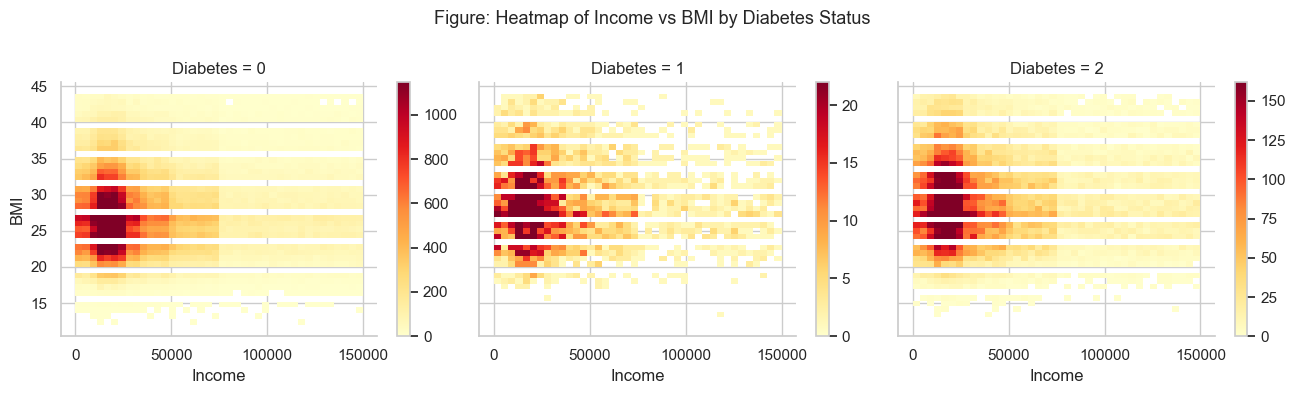

In [733]:
df_heat = df[["Income", "BMI", "Diabetes"]].copy()
g = sns.FacetGrid(df_heat, col="Diabetes", height=4, aspect=1.1)
g.map_dataframe(
    sns.histplot,
    x="Income",
    y="BMI",
    bins=40,
    pmax=0.8,            
    cbar=True,           
    cmap="YlOrRd"        
)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Figure: Heatmap of Income vs BMI by Diabetes Status", fontsize=13)
g.set_axis_labels("Income", "BMI")
plt.show()


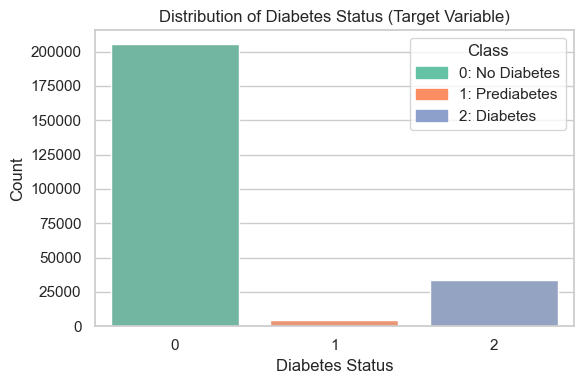

In [734]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Diabetes", hue="Diabetes", palette="Set2", legend=False)
plt.title("Distribution of Diabetes Status (Target Variable)")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
legend_labels = [
    mpatches.Patch(color=sns.color_palette("Set2")[0], label="0: No Diabetes"),
    mpatches.Patch(color=sns.color_palette("Set2")[1], label="1: Prediabetes"),
    mpatches.Patch(color=sns.color_palette("Set2")[2], label="2: Diabetes")
]
plt.legend(handles=legend_labels, title="Class")
plt.tight_layout()
plt.show()


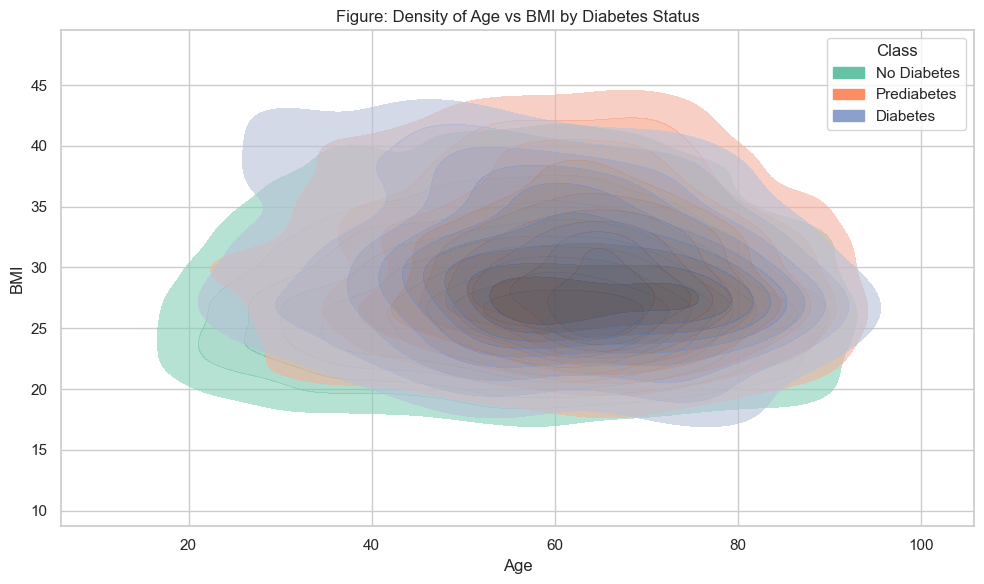

In [735]:
diabetes_labels = {
    0: "No Diabetes",
    1: "Prediabetes",
    2: "Diabetes"
}
sample_df = df.sample(n=12000, random_state=5310)
sample_df["Diabetes"] = sample_df["Diabetes"].map(diabetes_labels)

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(
    data=sample_df,
    x="Age",
    y="BMI",
    hue="Diabetes",
    fill=True,
    common_norm=False,
    palette="Set2",
    alpha=0.6,
    thresh=0.05
)
legend_patches = [
    mpatches.Patch(color=sns.color_palette("Set2")[0], label="No Diabetes"),
    mpatches.Patch(color=sns.color_palette("Set2")[1], label="Prediabetes"),
    mpatches.Patch(color=sns.color_palette("Set2")[2], label="Diabetes"),
]
plt.legend(handles=legend_patches, title="Class")
plt.title("Figure: Density of Age vs BMI by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()
